In [1]:
import os
import sys
import time
import json
import shutil
import warnings
warnings.filterwarnings('ignore')
import argparse
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, matthews_corrcoef
from imblearn.metrics import geometric_mean_score
from metrics import *
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from dataset import *
from utils import *
from models import *

# pre-training

In [2]:
!pwd

/home/user/wanzhang/Transformer4Ab-locla


In [10]:
os.listdir("./results/SAbDab/full/seq1_neg0/pesi/")

['model_bestauc.pth',
 'val_loss_buf.npy',
 'val_acc_bestmcc.npy',
 'model_bestgmean.pth',
 'val_gmean_best.npy',
 'val_acc_bestf1.npy',
 'val_auc_best.npy',
 'val_acc_bestgmean.npy',
 'val_f1_bestf1.npy',
 'val_acc_buf.npy',
 'model_bestf1.pth',
 'val_gmean_bestauc.npy',
 'val_auc_bestgmean.npy',
 'val_acc_bestauc.npy',
 'val_acc_best.npy',
 'val_gmean_bestf1.npy',
 'val_gmean_buf.npy',
 'model.pth',
 'val_mcc_bestauc.npy',
 'val_gmean_bestmcc.npy',
 'val_auc_bestmcc.npy',
 'loss_buf.npy',
 'val_auc_bestf1.npy',
 'val_mcc_buf.npy',
 'model_best.pth',
 'val_gmean_bestgmean.npy',
 'val_f1_buf.npy',
 'val_f1_bestauc.npy',
 'model_bestmcc.pth',
 'val_f1_best.npy',
 'val_mcc_bestf1.npy',
 'val_f1_bestmcc.npy',
 'val_mcc_bestgmean.npy',
 'val_mcc_bestmcc.npy',
 'val_auc_bestauc.npy',
 'val_mcc_best.npy',
 'val_auc_buf.npy',
 'val_f1_bestgmean.npy']

([<matplotlib.lines.Line2D at 0x7f91ff888ee0>], 44, 0.7737109661102295)

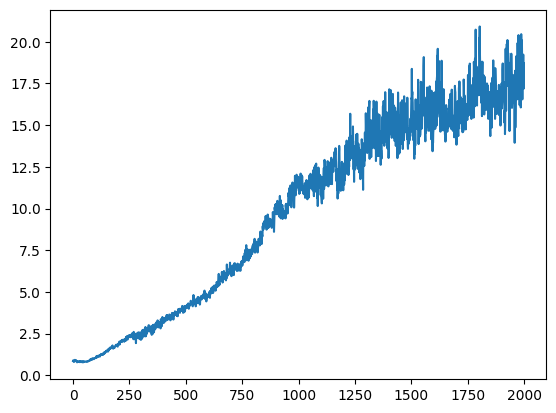

In [11]:
val_loss_buf = np.load("./results/SAbDab/full/seq1_neg0/pesi/val_loss_buf.npy")
val_acc_best = np.load("./results/SAbDab/full/seq1_neg0/pesi/val_acc_best.npy")
val_f1_best = np.load("./results/SAbDab/full/seq1_neg0/pesi/val_f1_best.npy")
val_auc_best = np.load("./results/SAbDab/full/seq1_neg0/pesi/val_auc_best.npy")
val_gmean_best = np.load("./results/SAbDab/full/seq1_neg0/pesi/val_gmean_best.npy")
val_mcc_best = np.load("./results/SAbDab/full/seq1_neg0/pesi/val_mcc_best.npy")

plt.plot(val_loss_buf), list(val_loss_buf).index(val_loss_buf.min()), val_loss_buf.min()

In [14]:
val_acc_best, val_f1_best, val_auc_best, val_gmean_best, val_mcc_best

(array(0.3655914),
 array(0.3269962),
 array(0.48564144),
 array(0.41258061),
 array(0.02968637))

# fine-tuning 10-fold

In [51]:
def eval_results(path="pesi_05-29-00-56-03", ntimes=3):
    results = []

    for i in range(ntimes):
        result_i = pickle.load(open("./results/CoV-AbDab/pesi_05-29-00-56-03/result_{}.pkl".format(i), "rb"))
        results.append(result_i)

    print("{} times".format(len(results)))
    
    acc = [np.mean(tmp[1]) for tmp in results]
    f1 = [np.mean(tmp[2]) for tmp in results]
    auc = [np.mean(tmp[3]) for tmp in results]
    gmean = [np.mean(tmp[4]) for tmp in results]
    mcc = [np.mean(tmp[5]) for tmp in results]
    
    print("acc: \t{:.4f} ± {:.4f}".format(np.mean(acc), np.std(acc)))
    print("f1: \t{:.4f} ± {:.4f}".format(np.mean(f1), np.std(f1)))
    print("auc: \t{:.4f} ± {:.4f}".format(np.mean(auc), np.std(auc)))
    print("gmean: \t{:.4f} ± {:.4f}".format(np.mean(gmean), np.std(gmean)))
    print("mcc: \t{:.4f} ± {:.4f}".format(np.mean(mcc), np.std(mcc)))
    
    # confusion matrices
    test_dataset = SeqDataset(data_path="../SARS-SAbDab_Shaun/CoV-AbDab_extract.csv", 
                              kfold=ntimex, 
                              holdout_fold=i, 
                              is_train_test_full="test", 
                              use_pair=False, 
                              balance_samples=False, 
                              use_part=False)
    use_aug = True
    collate_fn_test = my_collate_fn1 if use_aug==True else collate_fn
    test_loader = torch.utils.data.DataLoader(test_dataset, 
                                              batch_size=1, 
                                              shuffle=False, 
                                              collate_fn=collate_fn_test)
    

In [52]:
eval_results("pesi_05-29-00-56-03", ntimes=3)

3 times
acc: 	0.7370 ± 0.0000
f1: 	0.8475 ± 0.0000
auc: 	0.6530 ± 0.0126
gmean: 	0.0000 ± 0.0000
mcc: 	0.0000 ± 0.0000


In [53]:
eval_results("pesi_05-29-15-50-44", ntimes=3)

3 times
acc: 	0.7370 ± 0.0000
f1: 	0.8475 ± 0.0000
auc: 	0.6530 ± 0.0126
gmean: 	0.0000 ± 0.0000
mcc: 	0.0000 ± 0.0000
